# Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset

I will use MNIST Fashion Dataset. This is a dataset that is included in keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist #load datset

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data() #split into testing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

We have 60000 images, 28*28 pixeles

In [8]:
train_images[0,23,23] #one pixel, (pixel values are between 0 and 255, 0 being black and 255 being white)

194

In [9]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Labels are integers ranging from 0-9. Each integer represents a specific article of clothing

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Showing one of the 60000 images

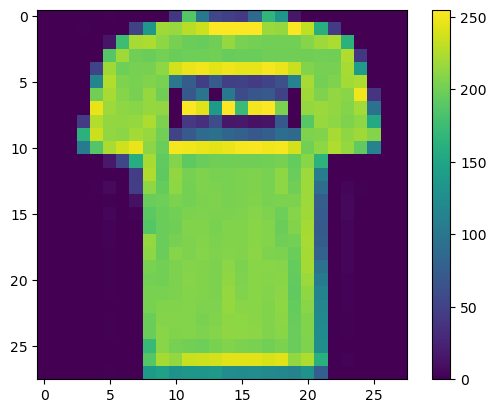

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In this step, we scale all of our greyscale pixel values 0 - 255 to be between 0 and 1. This is because smaller values will make it easier for the model to process our values

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the model

In [14]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
    keras.layers.Dense (128, activation='relu'), #hidden layer (2)
    keras.layers.Dense(10,activation='softmax') #output layer (3)

])

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
